# Кластеризация. Метод K-Means. Домашнее задание

## Задача

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [19]:
# загружаем данные
df = pd.read_csv('Mall_Customers (1).csv').drop('CustomerID', axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
df.shape

(200, 4)

In [21]:
# Проверим наличие пропусков
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
# описание признаков
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.97,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.26,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.82,1.0,34.75,50.0,73.0,99.0


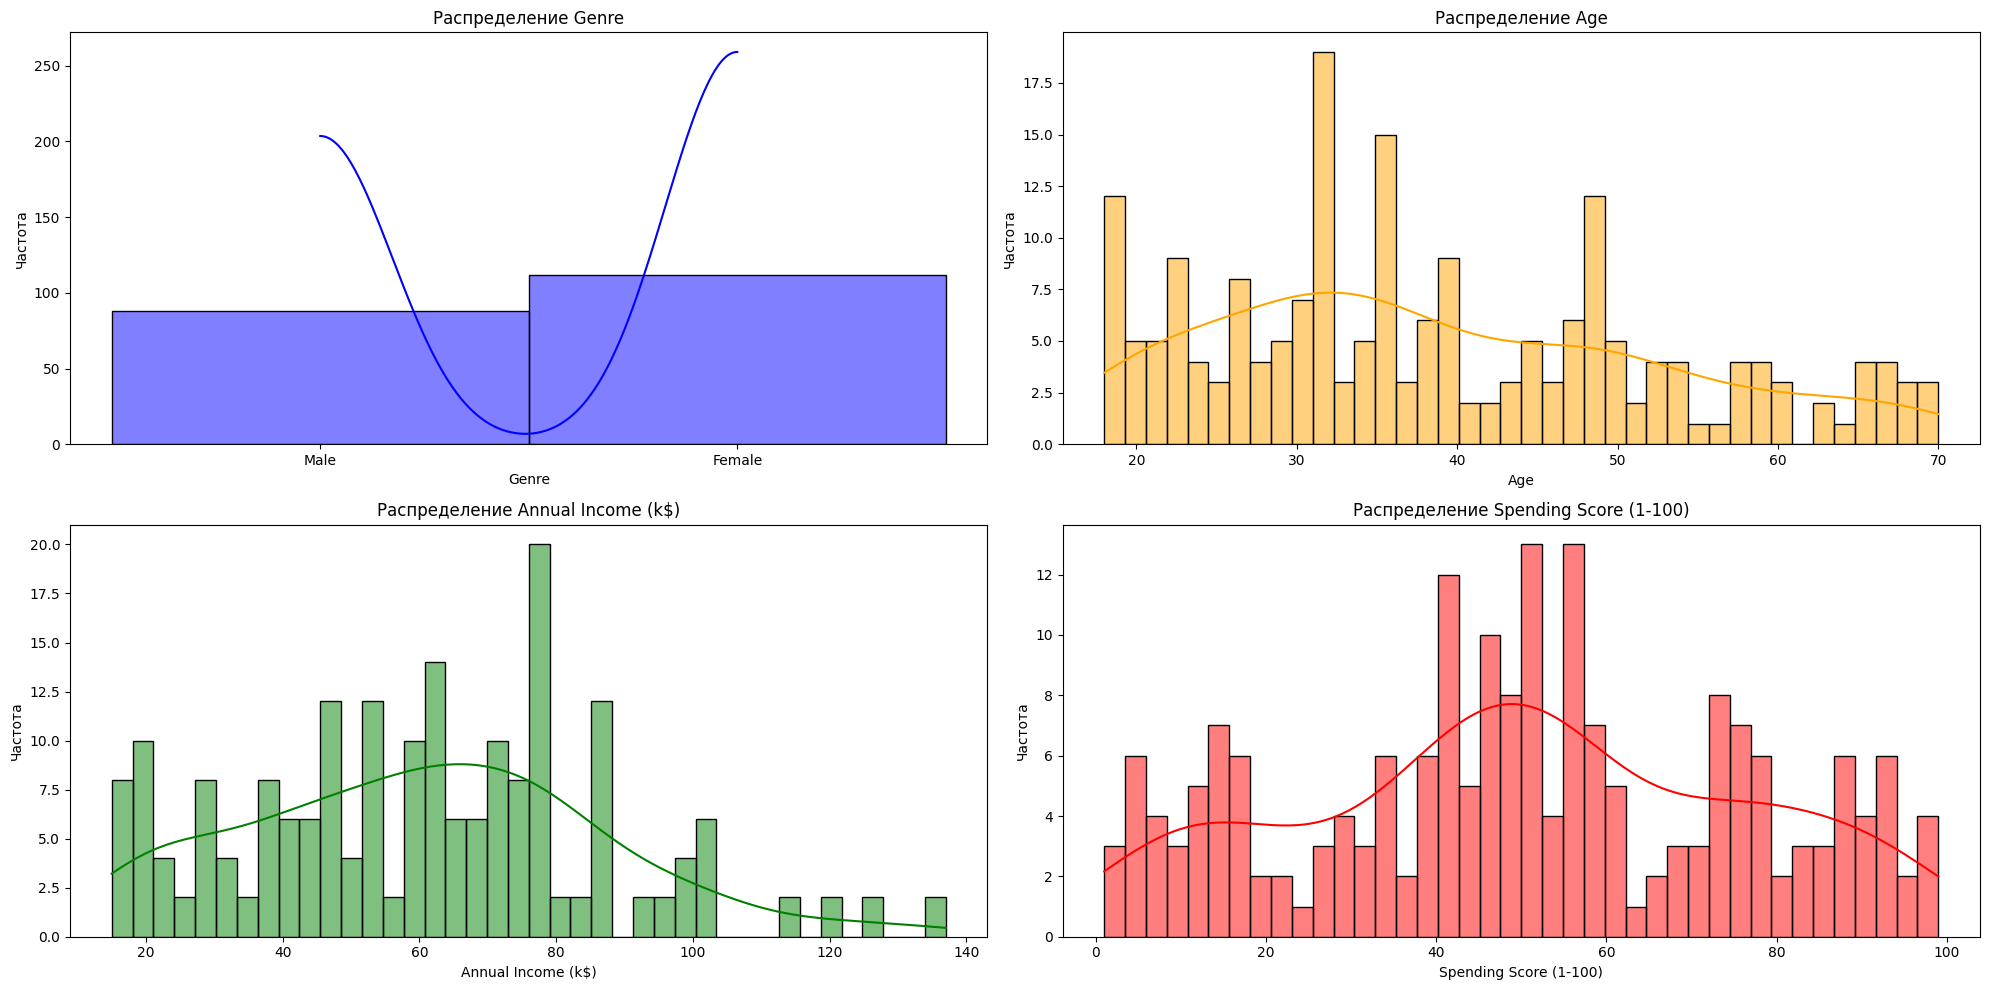

In [6]:
# визуализируем данные


# функция для гистограммы
def plot_hist(data):
    color_list = ['blue', 'orange', 'green', 'red']
    i = 0
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    for ax in axs.flat:
        if i < len(data.columns):
            sns.histplot(data[data.columns[i]], bins=40, kde=True, color=color_list[i], ax=ax)
            ax.set_title(f'Распределение {data.columns[i]}')
            ax.set_xlabel(data.columns[i])
            ax.set_ylabel('Частота')
            i+=1
    plt.tight_layout()
    plt.show()

plot_hist(df)

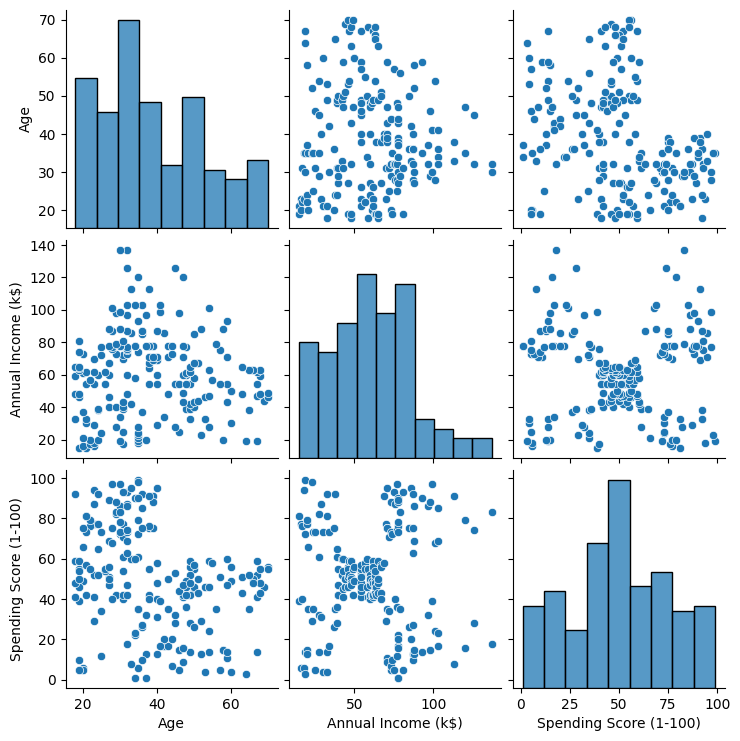

In [23]:
sns.pairplot(df)
plt.show()

**Выводы:**
- Пропуски отсутствуют
- Выбросы отсутствуют 
- Между переменными не наблюдается четких линейных корреляций. Но можно заметить, что люди среднего возраста (30-50 лет) в среднем имеют более высокий доход, чем более молодые или более пожилые.
- Можно увидеть в разделение на кластеры между Annual Income (k$) и Spending Score (1-100)

### Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

**Вывод:**
- На основе визуального анализа можно сделать вывод, что оптимальное количество кластеров для данных в данном случае равно 5.

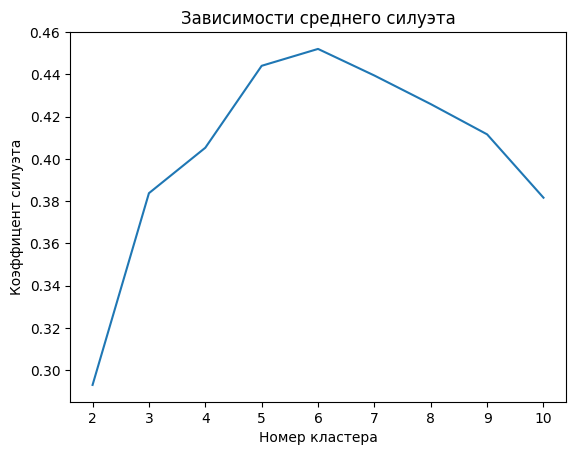

In [29]:
# Создаем список для хранения значений среднего силуэта
sil_avg = []

# Проходим по различным значениям k (число кластеров)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    sil_avg.append(score)

# Построение графика
plt.plot(range(2, 11), sil_avg)
plt.xlabel("Номер кластера")
plt.ylabel("Коэффицент силуэта")
plt.title("Зависимости среднего силуэта")
plt.show()

### Задание 3

Преобразуйте категориальный признак Genre в численный.

In [30]:
# Закодируем признак Genre
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя.

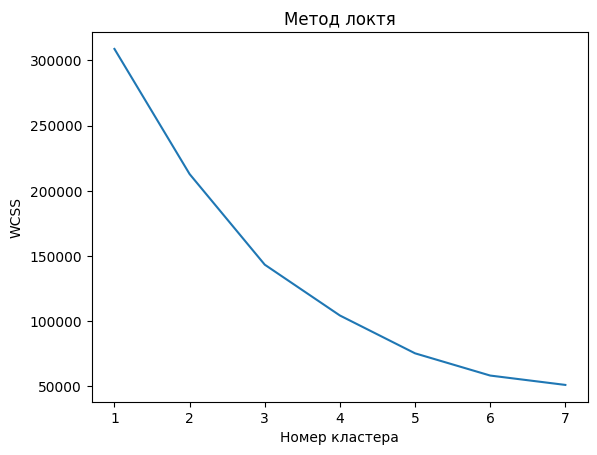

In [28]:
# Создаем список для хранения значений инерции
wcss = []

# Проходим по различным значениям k
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1, 8), wcss)
plt.title('Метод локтя')
plt.xlabel('Номер кластера')
plt.ylabel('WCSS')
plt.show()

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных.